<IPython.core.display.Latex object>

 1


<IPython.core.display.Latex object>

 0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

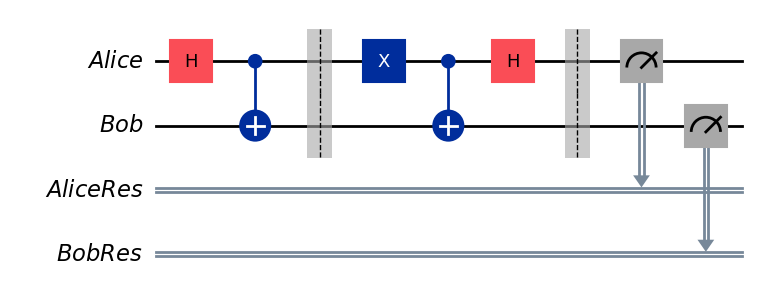

In [44]:
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit
from qiskit.quantum_info import Statevector,Operator
from IPython.display import display,Latex
from qiskit_aer import AerSimulator
from random import choice

# Setup Circuit for Simulation Conditions

Qa = QuantumRegister(1,"Alice")
Qb = QuantumRegister(1,"Bob")
Ca = ClassicalRegister(1,"AliceRes")
Cb = ClassicalRegister(1,"BobRes")
qc = QuantumCircuit(Qa,Qb,Ca,Cb)
display(Latex(f"Enter Value for c:"))
c = int(input())
display(Latex(f"Enter Value for d:"))
d = int(input())
qc.h(0)
qc.cx(0,1)
qc.barrier()

# Creating SuperdenseCoding Algorithm
if (d==1):
    qc.z(0)
if (c==1):
    qc.x(0)
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure(Qa,Ca)
qc.measure(Qb,Cb)

# Simulate and Display Measured CD Values
sim = AerSimulator()
job = sim.run(qc, shots=1)
result = job.result()
counts = result.get_counts()
measured_string = list(counts.keys())[0]
val_c, val_d = measured_string.split(' ')
display(Latex(f"Sent: c={c}, d={d}"))
display(Latex(f"Received: c={val_c}, d={val_d}"))
display(qc.draw(output="mpl", cregbundle=False))